# CLIMATE CHANGE: EARTH TEMPERATURE

### 1. Read Data From CSV file

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

Read csv data and parse "dt" as pandas timestamps type data.

In [9]:
df = pd.read_csv("../data/raw/temperature/GlobalLandTemperaturesByMajorCity.csv", parse_dates=['dt'])
df.head()

,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude
0,1849-01-01,26.704,1.435,Abidjan,Côte D'Ivoire,5.63N,3.23W
1,1849-02-01,27.434,1.362,Abidjan,Côte D'Ivoire,5.63N,3.23W
2,1849-03-01,28.101,1.612,Abidjan,Côte D'Ivoire,5.63N,3.23W
3,1849-04-01,26.140,1.387,Abidjan,Côte D'Ivoire,5.63N,3.23W
4,1849-05-01,25.427,1.200,Abidjan,Côte D'Ivoire,5.63N,3.23W


In [10]:
df.tail()

,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude
239172,2013-05-01,18.979,0.807,Xian,China,34.56N,108.97E
239173,2013-06-01,23.522,0.647,Xian,China,34.56N,108.97E
239174,2013-07-01,25.251,1.042,Xian,China,34.56N,108.97E
239175,2013-08-01,24.528,0.840,Xian,China,34.56N,108.97E
239176,2013-09-01,NaN,NaN,Xian,China,34.56N,108.97E


In [11]:
type(df.dt[0])

pandas._libs.tslibs.timestamps.Timestamp

In [12]:
# Rename column "dt" to "Date" and set the column as it's index. 
df.rename(columns = {'dt':'Date'}, inplace=True)
df.set_index(['Date'], inplace=True)
df.head()

,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude
Date,,,,,,
1849-01-01,26.704,1.435,Abidjan,Côte D'Ivoire,5.63N,3.23W
1849-02-01,27.434,1.362,Abidjan,Côte D'Ivoire,5.63N,3.23W
1849-03-01,28.101,1.612,Abidjan,Côte D'Ivoire,5.63N,3.23W
1849-04-01,26.140,1.387,Abidjan,Côte D'Ivoire,5.63N,3.23W
1849-05-01,25.427,1.200,Abidjan,Côte D'Ivoire,5.63N,3.23W


### 2. Get General Information

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 239177 entries, 1849-01-01 to 2013-09-01
Data columns (total 6 columns):
AverageTemperature               228175 non-null float64
AverageTemperatureUncertainty    228175 non-null float64
City                             239177 non-null object
Country                          239177 non-null object
Latitude                         239177 non-null object
Longitude                        239177 non-null object
dtypes: float64(2), object(4)
memory usage: 12.8+ MB


In [14]:
df.describe()

,AverageTemperature,AverageTemperatureUncertainty
count,228175.000000,228175.000000
mean,18.125969,0.969343
std,10.024800,0.979644
min,-26.772000,0.040000
25%,12.710000,0.340000
50%,20.428000,0.592000
75%,25.918000,1.320000
max,38.283000,14.037000


In [15]:
df.City.describe()

count     239177
unique       100
top        Paris
freq        3239
Name: City, dtype: object

In [16]:
df.Country.describe()

count     239177
unique        49
top        India
freq       36582
Name: Country, dtype: object

### 3. Change Latitude and Longitude Format

In [17]:
df.head()

,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude
Date,,,,,,
1849-01-01,26.704,1.435,Abidjan,Côte D'Ivoire,5.63N,3.23W
1849-02-01,27.434,1.362,Abidjan,Côte D'Ivoire,5.63N,3.23W
1849-03-01,28.101,1.612,Abidjan,Côte D'Ivoire,5.63N,3.23W
1849-04-01,26.140,1.387,Abidjan,Côte D'Ivoire,5.63N,3.23W
1849-05-01,25.427,1.200,Abidjan,Côte D'Ivoire,5.63N,3.23W


In [18]:
df.tail()

,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude
Date,,,,,,
2013-05-01,18.979,0.807,Xian,China,34.56N,108.97E
2013-06-01,23.522,0.647,Xian,China,34.56N,108.97E
2013-07-01,25.251,1.042,Xian,China,34.56N,108.97E
2013-08-01,24.528,0.840,Xian,China,34.56N,108.97E
2013-09-01,NaN,NaN,Xian,China,34.56N,108.97E


In [19]:
type(df.Latitude['1849-01-01'][0])

str

In [20]:
df["Latitude"]  = df.Latitude.map(lambda x : float(str(x)[:-1]) if x[-1]=="N" else -float(str(x)[:-1]))
df["Longitude"] = df.Longitude.map(lambda x : float(str(x)[:-1]) if x[-1]=="E" else -float(str(x)[:-1]))

In [21]:
df.head()

,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude
Date,,,,,,
1849-01-01,26.704,1.435,Abidjan,Côte D'Ivoire,5.63,-3.23
1849-02-01,27.434,1.362,Abidjan,Côte D'Ivoire,5.63,-3.23
1849-03-01,28.101,1.612,Abidjan,Côte D'Ivoire,5.63,-3.23
1849-04-01,26.140,1.387,Abidjan,Côte D'Ivoire,5.63,-3.23
1849-05-01,25.427,1.200,Abidjan,Côte D'Ivoire,5.63,-3.23


### 4. Deal With Missing Data

In [22]:
df.isnull().sum()

AverageTemperature               11002
AverageTemperatureUncertainty    11002
City                                 0
Country                              0
Latitude                             0
Longitude                            0
dtype: int64

In [23]:
# Creating a new column indicating if we have a null value in the Avg_temp column (1) or not (0)
df['temp_data'] = df['AverageTemperature'].apply(lambda x: 1 if not pd.isnull(x) else 0)
df.head()

,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude,temp_data
Date,,,,,,,
1849-01-01,26.704,1.435,Abidjan,Côte D'Ivoire,5.63,-3.23,1
1849-02-01,27.434,1.362,Abidjan,Côte D'Ivoire,5.63,-3.23,1
1849-03-01,28.101,1.612,Abidjan,Côte D'Ivoire,5.63,-3.23,1
1849-04-01,26.140,1.387,Abidjan,Côte D'Ivoire,5.63,-3.23,1
1849-05-01,25.427,1.200,Abidjan,Côte D'Ivoire,5.63,-3.23,1


In [24]:
# Verifying all null values have 0 
df['temp_data'].value_counts()

1    228175
0     11002
Name: temp_data, dtype: int64

In [25]:
# Null values by country
df['temp_data'].groupby(df['Country']).value_counts()

Country                             temp_data
Afghanistan                         1             2121
                                    0               48
Angola                              1             1735
                                    0              158
Australia                           1             4138
                                    0                8
Bangladesh                          1             2532
                                    0               81
Brazil                              1            12139
                                    0              791
Burma                               1             2532
                                    0               81
Canada                              1             6282
                                    0              196
Chile                               1             1900
                                    0                1
China                               1            34952
                   

In [33]:
# Extract just the year and month from the date column and create it's own column.
df['Year'] = df.index.year
df['Month'] = df.index.month
df.head()

,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude,temp_data,Year,Month
Date,,,,,,,,,
1849-01-01,26.704,1.435,Abidjan,Côte D'Ivoire,5.63,-3.23,1,1849,1
1849-02-01,27.434,1.362,Abidjan,Côte D'Ivoire,5.63,-3.23,1,1849,2
1849-03-01,28.101,1.612,Abidjan,Côte D'Ivoire,5.63,-3.23,1,1849,3
1849-04-01,26.140,1.387,Abidjan,Côte D'Ivoire,5.63,-3.23,1,1849,4
1849-05-01,25.427,1.200,Abidjan,Côte D'Ivoire,5.63,-3.23,1,1849,5


In [34]:
# Reviewing if there's null values in the last years of the data grouped by Year
df['temp_data'].groupby(df.index.year).value_counts().tail(50)

Date  temp_data
1965  1            1200
1966  1            1200
1967  1            1200
1968  1            1200
1969  1            1200
1970  1            1200
1971  1            1200
1972  1            1200
1973  1            1200
1974  1            1200
1975  1            1200
1976  1            1200
1977  1            1200
1978  1            1200
1979  1            1200
1980  1            1200
1981  1            1200
1982  1            1200
1983  1            1200
1984  1            1200
1985  1            1200
1986  1            1200
1987  1            1200
1988  1            1200
1989  1            1200
1990  1            1200
1991  1            1200
1992  1            1200
1993  1            1200
1994  1            1200
1995  1            1200
1996  1            1200
1997  1            1200
1998  1            1200
1999  1            1200
2000  1            1200
2001  1            1200
2002  1            1200
2003  1            1200
2004  1            1200
2005  1            1200


In [31]:
# Cek missing data
missingdf = pd.DataFrame(df.isna().sum()).rename(columns = {0: 'total'})
missingdf['percent'] = missingdf['total'] / len(df)
missingdf

,total,percent
AverageTemperature,11002,0.045999
AverageTemperatureUncertainty,11002,0.045999
City,0,0.000000
Country,0,0.000000
Latitude,0,0.000000
Longitude,0,0.000000
temp_data,0,0.000000
Year,0,0.000000
Month,0,0.000000


In [52]:
# Replace Missing Values
df[df['AverageTemperature'].isnull() ]
df['AverageTemperature'] = df.groupby("Month").transform(lambda x: x.fillna(x.mean()))
df['AverageTemperatureUncertainty'] = df.groupby("Month").transform(lambda x: x.fillna(x.mean()))
df.head()

,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude,temp_data,Year,Month
Date,,,,,,,,,
1849-01-01,26.704,26.704,Abidjan,Côte D'Ivoire,5.63,-3.23,1,1849,1
1849-02-01,27.434,27.434,Abidjan,Côte D'Ivoire,5.63,-3.23,1,1849,2
1849-03-01,28.101,28.101,Abidjan,Côte D'Ivoire,5.63,-3.23,1,1849,3
1849-04-01,26.140,26.140,Abidjan,Côte D'Ivoire,5.63,-3.23,1,1849,4
1849-05-01,25.427,25.427,Abidjan,Côte D'Ivoire,5.63,-3.23,1,1849,5


### 5. Describe Temperature by City

In [53]:
df_city = df.groupby(['City'])

In [54]:
df_city.head()

,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude,temp_data,Year,Month
Date,,,,,,,,,
1849-01-01,26.704000,26.704000,Abidjan,Côte D'Ivoire,5.63,-3.23,1,1849,1
1849-02-01,27.434000,27.434000,Abidjan,Côte D'Ivoire,5.63,-3.23,1,1849,2
1849-03-01,28.101000,28.101000,Abidjan,Côte D'Ivoire,5.63,-3.23,1,1849,3
1849-04-01,26.140000,26.140000,Abidjan,Côte D'Ivoire,5.63,-3.23,1,1849,4
1849-05-01,25.427000,25.427000,Abidjan,Côte D'Ivoire,5.63,-3.23,1,1849,5
1850-01-01,15.986000,15.986000,Addis Abeba,Ethiopia,8.84,38.11,1,1850,1
1850-02-01,18.345000,18.345000,Addis Abeba,Ethiopia,8.84,38.11,1,1850,2
1850-03-01,18.632000,18.632000,Addis Abeba,Ethiopia,8.84,38.11,1,1850,3
1850-04-01,18.154000,18.154000,Addis Abeba,Ethiopia,8.84,38.11,1,1850,4


In [55]:
df_city.describe()

AverageTemperature                                   \
                              count       mean        std        min   
City                                                                   
Abidjan                      1977.0  25.352227   3.138823  10.729900   
Addis Abeba                  1965.0  17.606791   2.150022  10.729900   
Ahmadabad                    2613.0  25.990025   4.766504  10.729900   
Aleppo                       2669.0  17.428952   8.326708   0.670000   
Alexandria                   2669.0  20.310747   4.558198  10.227000   
Ankara                       3105.0  10.794344   8.178185  -6.280000   
Baghdad                      2337.0  22.592219   9.175202   4.236000   
Bangalore                    2613.0  24.591258   2.427247  10.729900   
Bangkok                      2371.0  26.670729   2.893983  10.729900   
Belo Horizonte               2181.0  20.958280   2.191631  10.729900   
Berlin                       3239.0   9.127666   7.342640 -10.125000   
Bogotá                       2277.0  19.794440   1.832826  10.729900   
Bombay                       2613.0  26.295466   2.460690  10.729900   
Brasília                     2181.0  21.588904   1.719178  10.729900   
Cairo                        2460.0  21.196955   5.588490   9.137000   
Calcutta                     2613.0  25.802561   4.448048  10.729900   
Cali                         2265.0  21.348055   2.164396  10.729900   
Cape Town                    1881.0  16.094892   3.008430   9.997000   
Casablanca                   3009.0  17.203792   5.648007   6.011000   
Changchun                    2318.0   4.937079  14.135571 -23.272000   
Chengdu                      2318.0  11.066065   6.985673  -2.429000   
Chicago                      3239.0  10.333895   8.444066  -8.590000   
Chongqing                    2085.0  16.850845   7.371316   3.354000   
Dakar                        1977.0  24.280247   3.373599  10.729900   
Dalian                       2213.0  10.498761  10.216457  -9.348000   
Dar Es Salaam                1965.0  24.277504   3.921545  10.729900   
Delhi                        2613.0  24.577097   6.897056  10.729900   
Dhaka                        2613.0  25.268075   4.101322  10.729900   
Durban                       1881.0  20.348935   1.980744  11.757041   
Faisalabad                   2371.0  23.391029   7.707967   9.343000   
...                             ...        ...        ...        ...   
New Delhi                    2613.0  24.577097   6.897056  10.729900   
New York                     3239.0   9.867787   9.288319  -9.162000   
Paris                        3239.0  10.580576   5.996860  -3.876000   
Peking                       2318.0  11.849420  11.131381  -8.579000   
Pune                         2613.0  24.388467   3.333205  10.729900   
Rangoon                      2613.0  26.474118   2.490192  10.729900   
Rio De Janeiro               2181.0  23.569889   2.314300  10.729900   
Riyadh                       2049.0  25.139529   7.878897  10.496000   
Rome                         3239.0  12.108210   6.871091  -2.598000   
Saint Petersburg             3239.0   4.242125   9.093656 -18.644000   
Salvador                     2181.0  24.404114   2.043877  10.729900   
Santiago                     1901.0   5.700769   4.759366  -3.816000   
Santo Domingo                2277.0  25.736844   2.046361  10.729900   
Seoul                        2097.0  10.687204   9.876032  -8.992000   
Shanghai                     2073.0  15.972342   8.738554  -0.050000   
Shenyang                     2213.0   7.285982  12.349613 -17.035000   
Singapore                    2265.0  25.727535   2.947892  10.729900   
Surabaya                     2265.0  25.338090   3.843855  10.729900   
Surat                        2613.0  26.006949   4.174975  10.729900   
Sydney                       2073.0  17.006962   2.197763  12.004000   
São Paulo                    2181.0  19.639723   2.650601  10.729900   
Taipei                       2073.0  22.213179   4.157294

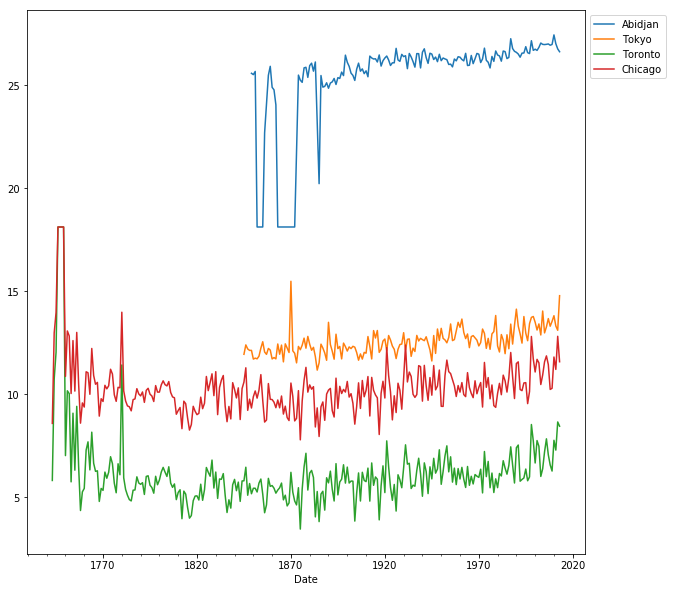

In [76]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(10, 10))
df_city.get_group('Abidjan').AverageTemperature.resample('Y').mean().plot(label='Abidjan')
df_city.get_group('Tokyo').AverageTemperature.resample('Y').mean().plot(label='Tokyo')
df_city.get_group('Toronto').AverageTemperature.resample('Y').mean().plot(label='Toronto')
df_city.get_group('Chicago').AverageTemperature.resample('Y').mean().plot(label='Chicago')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1));


In [57]:
df_country = df.groupby(['Country'])

In [58]:
df_country.describe()

AverageTemperature                        \
                                                count       mean        std   
Country                                                                       
Afghanistan                                    2169.0  14.407695   8.597289   
Angola                                         1893.0  23.243704   2.772573   
Australia                                      4146.0  15.195552   3.703100   
Bangladesh                                     2613.0  25.268075   4.101322   
Brazil                                        12930.0  22.560647   3.283927   
Burma                                          2613.0  26.474118   2.490192   
Canada                                         6478.0   5.522821  10.805512   
Chile                                          1901.0   5.700769   4.759366   
China                                         35444.0  11.880948  11.338371   
Colombia                                       4542.0  20.569195   2.150082   
Congo (Democratic Republic Of The)             1893.0  23.402627   2.339005   
Côte D'Ivoire                                  1977.0  25.352227   3.138823   
Dominican Republic                             2277.0  25.736844   2.046361   
Egypt                                          7589.0  20.885281   5.265582   
Ethiopia                                       1965.0  17.606791   2.150022   
France                                         3239.0  10.580576   5.996860   
Germany                                        3239.0   9.127666   7.342640   
India                                         36582.0  25.401058   5.138272   
Indonesia                                      4530.0  25.212950   3.792526   
Iran                                           2181.0  12.642616   8.757714   
Iraq                                           2337.0  22.592219   9.175202   
Italy                                          3239.0  12.108210   6.871091   
Japan                                          4095.0  13.709483   8.138933   
Kenya                                          1965.0  16.376165   2.182728   
Mexico                                         2145.0  15.717422   2.285342   
Morocco                                        3009.0  17.203792   5.648007   
Nigeria                                        5763.0  25.574041   3.411380   
Pakistan                                       7355.0  24.013440   7.022225   
Peru                                           1591.0  16.814908   2.860203   
Philippines                                    2025.0  26.439942   1.333652   
Russia                                         6478.0   4.282038   9.771097   
Saudi Arabia                                   4098.0  25.961109   6.444665   
Senegal                                        1977.0  24.280247   3.373599   
Singapore                                      2265.0  25.727535   2.947892   
Somalia                                        1965.0  25.832516   3.800693   
South Africa                                   3762.0  18.221914   3.318237   
South Korea                                    2097.0  10.687204   9.876032   
Spain                                          3239.0  11.603060   6.605282   
Sudan                                          1857.0  28.574741   4.418005   
Syria                                          2669.0  17.428952   8.326708   
Taiwan                                         2073.0  22.213179   4.157294   
Tanzania                                       1965.0  24.277504   3.921545   
Thailand                                       2371.0  26.670729   2.893983   
Turkey                                         9473.0  13.901006   7.408858   
Ukraine                                        3239.0   7.294728   9.829692   
United Kingdom                                 3239.0   9.658237   5.310852   
United States                                  8455.0  11.451701   8.563773   
Vietnam                                        2265.0  26.407009   3.126664   
Zimbab

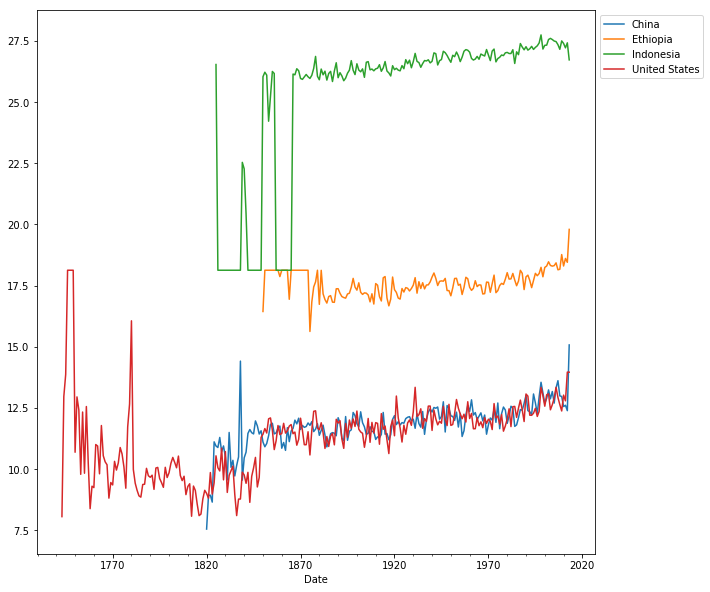

In [75]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(10, 10))
df_country.get_group('China').AverageTemperature.resample('Y').mean().plot(label='China')
df_country.get_group('Ethiopia').AverageTemperature.resample('Y').mean().plot(label='Ethiopia')
df_country.get_group('Indonesia').AverageTemperature.resample('Y').mean().plot(label='Indonesia')
df_country.get_group('United States').AverageTemperature.resample('Y').mean().plot(label='United States')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1));


In [60]:
# Filtering by years 1970-2013 because these didn't have many null values
new_df = df.loc['1970':'2013']
new_df.head()

,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude,temp_data,Year,Month
Date,,,,,,,,,
1970-01-01,27.183,27.183,Abidjan,Côte D'Ivoire,5.63,-3.23,1,1970,1
1970-02-01,28.436,28.436,Abidjan,Côte D'Ivoire,5.63,-3.23,1,1970,2
1970-03-01,28.400,28.400,Abidjan,Côte D'Ivoire,5.63,-3.23,1,1970,3
1970-04-01,27.900,27.900,Abidjan,Côte D'Ivoire,5.63,-3.23,1,1970,4
1970-05-01,26.901,26.901,Abidjan,Côte D'Ivoire,5.63,-3.23,1,1970,5


In [61]:
#  Statistical information by country
new_df.groupby('Country').describe()

AverageTemperature                        \
                                                count       mean        std   
Country                                                                       
Afghanistan                                     525.0  15.019101   8.554727   
Angola                                          525.0  24.127257   1.902779   
Australia                                      1050.0  15.684117   3.684277   
Bangladesh                                      525.0  25.990975   3.775216   
Brazil                                         3150.0  23.589222   2.938907   
Burma                                           525.0  27.249347   1.853644   
Canada                                         1050.0   6.018728  10.553112   
Chile                                           525.0   6.233115   4.812452   
China                                          8400.0  12.592065  11.048431   
Colombia                                       1050.0  21.443568   1.101485   
Congo (Democratic Republic Of The)              525.0  24.257846   1.093497   
Côte D'Ivoire                                   525.0  26.644636   1.388492   
Dominican Republic                              525.0  26.544935   1.247954   
Egypt                                          1575.0  21.493467   5.350624   
Ethiopia                                        525.0  17.951633   1.252414   
France                                          525.0  11.079985   5.759415   
Germany                                         525.0   9.684137   6.999290   
India                                          7350.0  26.336493   4.785802   
Indonesia                                      1050.0  27.169827   0.661125   
Iran                                            525.0  13.473808   8.802413   
Iraq                                            525.0  23.369017   9.320921   
Italy                                           525.0  12.586762   6.815941   
Japan                                          1050.0  14.204865   8.056058   
Kenya                                           525.0  16.507535   1.090102   
Mexico                                          525.0  16.138568   2.238414   
Morocco                                         525.0  17.759130   5.713907   
Nigeria                                        1575.0  26.799249   2.094464   
Pakistan                                       1575.0  25.335424   6.863613   
Peru                                            525.0  17.168476   2.638670   
Philippines                                     525.0  26.977227   1.281694   
Russia                                         1050.0   4.919758   9.320279   
Saudi Arabia                                   1050.0  27.003375   6.260097   
Senegal                                         525.0  25.141398   2.872146   
Singapore                                       525.0  27.059673   0.666910   
Somalia                                         525.0  27.571082   1.059494   
South Africa                                   1050.0  18.733755   3.354499   
South Korea                                     525.0  11.383177   9.638886   
Spain                                           525.0  12.034985   6.570848   
Sudan                                           525.0  29.519783   3.899023   
Syria                                           525.0  17.999968   8.665479   
Taiwan                                          525.0  22.770337   4.117776   
Tanzania                                        525.0  26.133895   1.602563   
Thailand                                        525.0  27.685756   1.648230   
Turkey                                         1575.0  14.236083   7.507258   
Ukraine                                         525.0   7.926442   9.432574   
United Kingdom                                  525.0  10.097661   5.002151   
United States                                  1575.0  12.507058   8.261085   
Vietnam                                         525.0  27.683033   1.089089   
Zimbab

In [62]:
# Shows the average temperature by country in descending order
new_df[['Country','AverageTemperature']].groupby(['Country']).mean().sort_values('AverageTemperature',ascending=False)

,AverageTemperature
Country,
Sudan,29.519783
Thailand,27.685756
Vietnam,27.683033
Somalia,27.571082
Burma,27.249347
Indonesia,27.169827
Singapore,27.059673
Saudi Arabia,27.003375
Philippines,26.977227


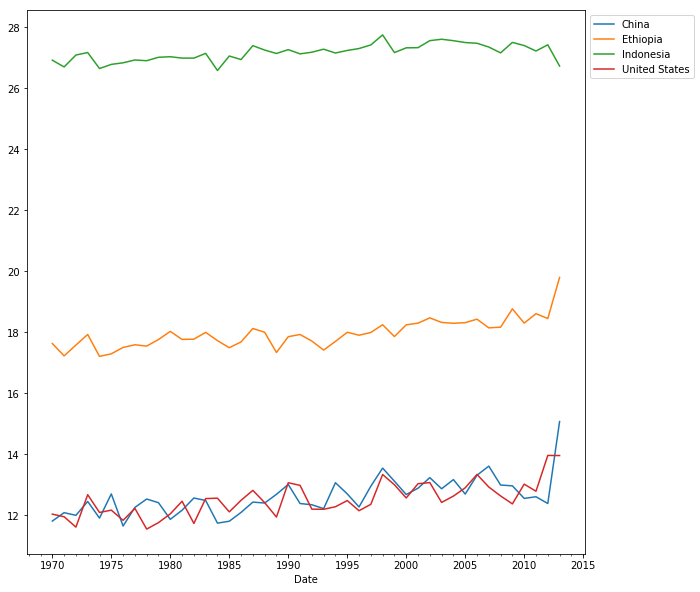

In [74]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(10, 10))
new_df_country = new_df.groupby(['Country'])
new_df_country.get_group('China').AverageTemperature.resample('Y').mean().plot(label='China')
new_df_country.get_group('Ethiopia').AverageTemperature.resample('Y').mean().plot(label='Ethiopia')
new_df_country.get_group('Indonesia').AverageTemperature.resample('Y').mean().plot(label='Indonesia')
new_df_country.get_group('United States').AverageTemperature.resample('Y').mean().plot(label='United States')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1));